# Obtención de insights

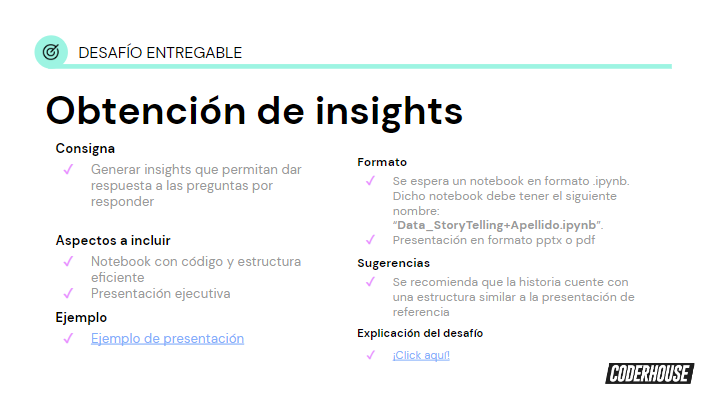

## Introduccion

En esta nueva entrega se realizara un breve analisis de las que, en el saber popular, se dicen ser las dos variables mas importantes para subir de division en StarCraft II.

Estas variables son: Las APM y los Trabajadores creados por unidad de tiempo

Para realizar este analisis comenzare analizando el comportamiento individual de esas variables y luego ver como afectan a la Liga del jugador

## Desarrollo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
data_skillcraft = pd.read_csv(r'C:\Users\Gaspar\Desktop\DataScience\SkillCraft.csv', delimiter = ",")

Primero que nada veamos un grafico de la distribucion de estas variables

D:\Juegos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


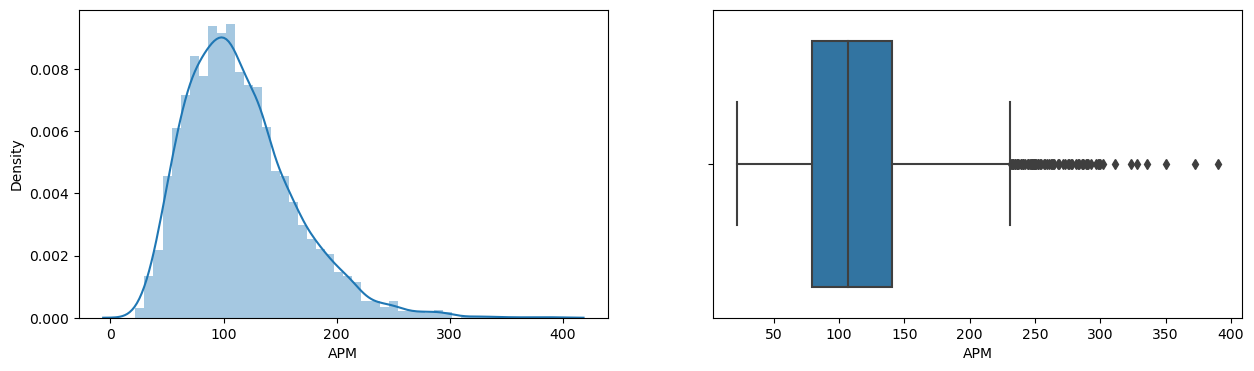

In [3]:
fig, ax = plt.subplots(1,2, figsize=(15, 4))
ax[0] = sns.distplot(data_skillcraft["APM"], ax=ax[0])
ax[1] = sns.boxplot(data_skillcraft["APM"], ax=ax[1])
plt.show()

Como podemos observar las APM tienen una distribucion normal centrada aproximadamente en 100 y con algunos valores que destacan a la derecha.

Veamos los mismos graficos para la variable de "WorkersMade"

D:\Juegos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Juegos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


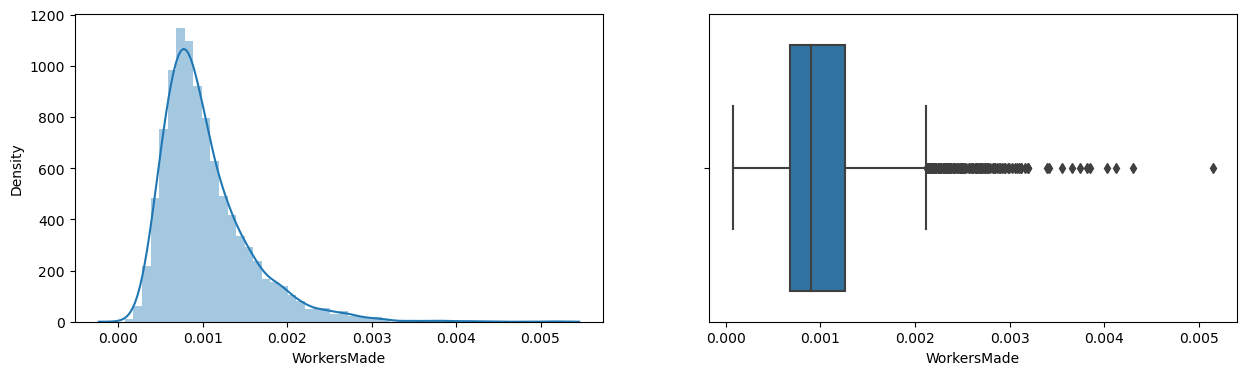

In [4]:
fig, ax = plt.subplots(1,2, figsize=(15, 4))
ax[0] = sns.distplot(data_skillcraft["WorkersMade"], ax=ax[0])
ax[1] = sns.boxplot(data_skillcraft["WorkersMade"], ax=ax[1])
plt.show()

Al igual que en el caso de las APM tenemos una distribucion normal con algunos valores que destacan hacia la derecha del grafico.

Ahora veamos las medidas de tendencia central para ambas variables.

In [5]:
media = data_skillcraft["APM"].mean()
mediana = data_skillcraft["APM"].median()

print("La media de APM es:", media)
print("La mediana de APM es:", mediana)

La media de APM es: 114.57576332534438
La mediana de APM es: 107.0703


En caso que la distribucion fuese perfectamente simetrica, ambos valores deberian de coincidir; Este no es el caso debido a, como se menciono anteriormente, la distribucion tiene algunos valores hacia la derecha de la misma, lo que hace que la media sea un poco mayor que la mediana.

Ahora analicemos la dispercion de los datos con lo que se conoce como la "Desviacion estandar"

In [6]:
std = data_skillcraft["APM"].std()
std

48.111912055494656

Lo que nos dice este valor es que si la distribucion fuese normal aproximadamente el 70% de los datos se encuentran en el intervalo de la media +- la desviacion estandar, es decir:

In [7]:
intervalo = [media-std,media+std]

print("El 70% de los datos se encuentran entre los siguientes valores: ",intervalo)


El 70% de los datos se encuentran entre los siguientes valores:  [66.46385126984973, 162.68767538083904]


Ahora hagamos el mismo analisis para los trabajadores.

In [8]:
media = data_skillcraft["WorkersMade"].mean()
mediana = data_skillcraft["WorkersMade"].median()

print("La media de APM es:", media)
print("La mediana de APM es:", mediana)

La media de APM es: 0.001031008176153387
La mediana de APM es: 0.00090423


En este caso podemos observar que la media es aproximadamente un orden de magnitud mayor que la mediana, lo cual es algo destacable ya que a simple vista no se observaba un sesgo demasiado grande hacia la derecha del grafico

In [9]:
std = data_skillcraft["WorkersMade"].std()
std

0.0005203663048927065

In [10]:
intervalo = [media-std,media+std]

print("El 70% de los datos se encuentran entre los siguientes valores: ",intervalo)

El 70% de los datos se encuentran entre los siguientes valores:  [0.0005106418712606804, 0.0015513744810460935]


Para finalizar haremos un ajuste por cuadrados minimos para ver como se relacionan las variables vistas anteriormente con la liga de los jugadores

comenzando por las APM

In [25]:
model = sm.ols(formula = 'LeagueIndex~APM', data = data_skillcraft).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LeagueIndex   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     2129.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:59:26   Log-Likelihood:                -5148.1
No. Observations:                3338   AIC:                         1.030e+04
Df Residuals:                    3336   BIC:                         1.031e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9681      0.051     38.899      0.0

Podemos observar que hay una cierta correlacion gracias al R-squared que es igual a 0.39, aunque no es demasiada marcada.
Por otro lado podemos justificar la causalidad diciendo que entre mas acciones lleve a cabo un jugador en la partida es logico pensar que tendra mas recursos, mayor ejercito, etc.

Veamos finalmente el modelo de los Trabajadores

In [26]:
model = sm.ols(formula = 'LeagueIndex~WorkersMade', data = data_skillcraft).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LeagueIndex   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     355.8
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           1.70e-75
Time:                        13:32:58   Log-Likelihood:                -5802.8
No. Observations:                3338   AIC:                         1.161e+04
Df Residuals:                    3336   BIC:                         1.162e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.2300      0.053     61.063      

En este caso vemos que la correlacion es mucho menor, esto puede deberse a factores como la duracion de la partida (debido a que en un punto muy avanzado de la partida ya no querras seguir creando trabajadores), encontrar un equilibrio (tener solo un trabajador puede ser tan malo como ocupar todo el espacio para unidades con trabajadores).